In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/time_series_data

/content/drive/My Drive/Colab Notebooks/time_series_data


A building block to Random Forest is a Decision Tree. Decision trees start with a root node and end with a leaf node. For numeric feature, tree split on each unique value of each data. Tree-based models may poorly handle trends in data, compared to linear models, so you have to detrend your series first, which was done in the previous video.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Vacation data
# Load the data
df1= pd.read_csv('vacation_lags_12months_features.csv', header=0)
df1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
1,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0
2,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0
3,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0
4,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0,-20.0


In [5]:
# split data
vacat = df1.values
# split into lagged variables and origianl time series
X1= vacat[:, 0:-1]# Slice all rows and start with column 0 and go up to but not including the last column
y1 = vacat[:,-1] # Slice all rows and last column, esssentially seperating out 't' column

In [6]:
# Columns t-1 to t-12 which are the lagged variables
X1
# column t which is the origianl time series

array([[ 10.,   9.,  -2., ...,  -6.,  -3., -11.],
       [  9.,  -2., -17., ...,  -3., -11.,   3.],
       [ -2., -17., -18., ..., -11.,   3.,  13.],
       ...,
       [-11., -12.,  -1., ...,   1.,  11.,  -2.],
       [-12.,  -1.,   4., ...,  11.,  -2., -11.],
       [ -1.,   4.,  15., ...,  -2., -11.,  -7.]])

In [7]:
y1[0:10]

array([  3.,  13.,  -4., -16., -20.,  -2.,   3.,   3.,  30., -11.])

Below you can alter the splits as 50-50, 60-40, 70-30 , 75-25, 80-20, and 85-15, etc. So 0.8 is a 80-20 splot

In [8]:
# Target train-test split
Y1=y1
traintarget_size = int(len(Y1)* 0.8)# Set split
train_target, tesst_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]
print('Observations for Target: %d' %( len(Y1)))
print('Traing Observations for Target: %d' %( len(train_target)))
print('Testing Observations for Target: %d' %( len(tesst_target)))

Observations for Target: 174
Traing Observations for Target: 139
Testing Observations for Target: 35


In [9]:
# Featueres train test split
trainfeature_size =  int(len(X1)*0.8)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for Feature: %d' %( len(X1)))
print('Traing Observations for Feature: %d' %( len(train_feature)))
print('Testing Observations for Feature: %d' %( len(test_feature)))

Observations for Feature: 174
Traing Observations for Feature: 139
Testing Observations for Feature: 35


In [11]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regression model with defeaut arguments
decision_tree_vacat = DecisionTreeRegressor() # max-depth not set

# Fit the model to the training features and targets
decision_tree_vacat.fit(train_feature, train_target)

# check the score on train and test
print(decision_tree_vacat.score(train_feature, train_target))
print(decision_tree_vacat.score(test_feature, tesst_target)) # Predictions are horrible if negative value, no relationship if 0

1.0
0.5386421090646443


In [13]:
# Find the best Max Depth
# Loop throgh a few different max dephs and check the performance
# Try different max dephs. We want to optimize our ML models to make the best prediction posssible
# For regular decision trees, max_depth which is a hyper parameter, limits the number of splits in a tree
# You can find the best value of max_depth based on the R-squared score of the model on the test set
for d in [2,3,4,5,7,8,10]:
  # Create the tree and fit it
  decision_tree_vacat = DecisionTreeRegressor(max_depth=d)
  decision_tree_vacat.fit(train_feature, train_target)
  # Print out the socres on traina nd test
  print('max depth= ', str(d))
  print(decision_tree_vacat.score(train_feature, train_target))
  print(decision_tree_vacat.score(test_feature, tesst_target), '\n')
  # you want to test score to be possitive and high

max depth=  2
0.836755084049483
0.5100670898047248 

max depth=  3
0.9202849260705976
0.5338183325628844 

max depth=  4
0.9505108563131668
0.5424299225198469 

max depth=  5
0.9731320934255739
0.551324477014031 

max depth=  7
0.9945227439718145
0.5712678005641382 

max depth=  8
0.9979417202626701
0.5679504600609353 

max depth=  10
0.9998990581954493
0.49650896833995417 



Decision-tree learners can create over-complex treees that tdo not generalize the datawell. This is call over fitting

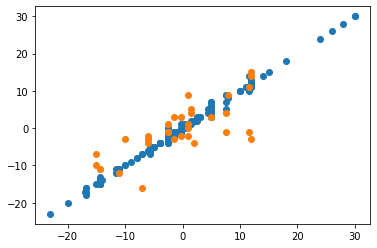

In [14]:
# Plot the predicted against actual values
# use the best max_depth
decision_tree_vacat=DecisionTreeRegressor(max_depth=7) # fill in the best max depth here
decision_tree_vacat.fit(train_feature, train_target)

# preidct values for train and test
train_prediction= decision_tree_vacat.predict(train_feature)
test_prediction= decision_tree_vacat.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')
plt.scatter(test_prediction, tesst_target, label='test')
plt.show()